<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Construcción y Comparación de Modelos de Clasificación

El objetivo de esta práctica es construir múltiples modelos de clasificación para predecir la probabilidad de que una transacción sea fraudulenta. Además de implementar los modelos, deberás analizar y comparar las métricas obtenidas para seleccionar el modelo que mejor se ajuste al problema. En este laboratorio deberás: 



- Entrenar al menos tres modelos diferentes de clasificación, como:

   - **Regresión logística**

   - **Árboles de decisión**

   - **Bosques aleatorios**

   - etc.


- Obtener las siguientes métricas para cada modelo:

   - Precisión

   - Recall (Sensibilidad)

   - F1-Score

   - Área bajo la curva ROC (AUC-ROC)

   - Matriz de confusión

   - Accuracy

- Visualizar y comparar estas métricas en gráficos claros y explicativos.


- Analizar las métricas de rendimiento de cada modelo.

- Justificar la selección del modelo más adecuado en función del equilibrio entre precisión y recall, así como la interpretación del área bajo la curva ROC.



In [1]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [3]:
# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------

from src import soporte_ajuste_logistica as sal
from src import soporte_logistica_ensamble as sle


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_pickle('datos/datos_preprocesados.pkl')

In [6]:
df.head()

,is_fraudulent,customer_id,merchant_id,amount,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,...,location_City-9,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75,outliers_ifo_0.1_25,outliers_ifo_0.1_50,outliers_ifo_0.1_75
0,0.0,0.779808,0.510079,0.575423,0.900628,0.480769,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.791454,0.584829,0.189301,0.143774,0.826923,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.948651,0.463460,0.123960,0.900628,0.750000,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.791454,0.541243,0.761671,0.512530,0.788462,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.518519,0.533525,0.188153,0.678115,0.346154,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
df = df.astype(float)

In [8]:
# instanciamos la clase de regresión logistica
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.560,0.559949,0.560,0.559915,0.119783,0.58788,0.006983,NaN,NaN,NaN
test,0.566,0.566030,0.566,0.566014,0.131055,0.59057,NaN,NaN,0.006983,NaN


Un accuracy del 57 % en el test quiere decir que el modelo apenas predice algo mejor que la aleatoridad o azar (que sería el 50%).

La precision es del 57  % y dado que en el EDA no apreciamos desbalanceo, podemos concluir que predice igual de bien (o de mal) los positivos que los negativos.

El recall indica que un 57% de los positivos fueron correctamente identificados por el modelo.

El f1 también se mueve en torno al 57% cosa, totalmente lógica dado que esta métrica es la media armónica de accuracy y precision.

La kappa de menos de 0.15 en el test indica que tenemos una concordancia muy leve teniendo en cuenta que el 0 es el azar y el 1 indica concordancia perfecta entre las predicciones y el valor verdadedo, pues la conclusión es que apenas mejoramos el modelo aleatorio




El AUC, area bajo la curva ROC, de 0.6 nos habla de un modelo que mejora en poco al azar (0,5) en su capacidad para clasificar. El AUC repr

Como tónica general se observa que en el test obtenemos datos ligeramente mejores que en el train y que los indicadores de las metricas son bajos, pues mejoramos en poco al azar. Por tanto, este modelo predictivo presenta underfittin

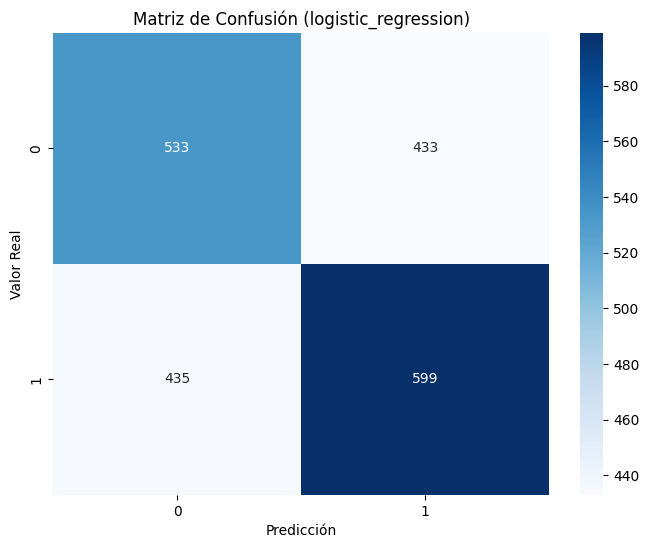

In [9]:
logistica.plot_matriz_confusion("logistic_regression")


A continuación sacamos la curva ROC

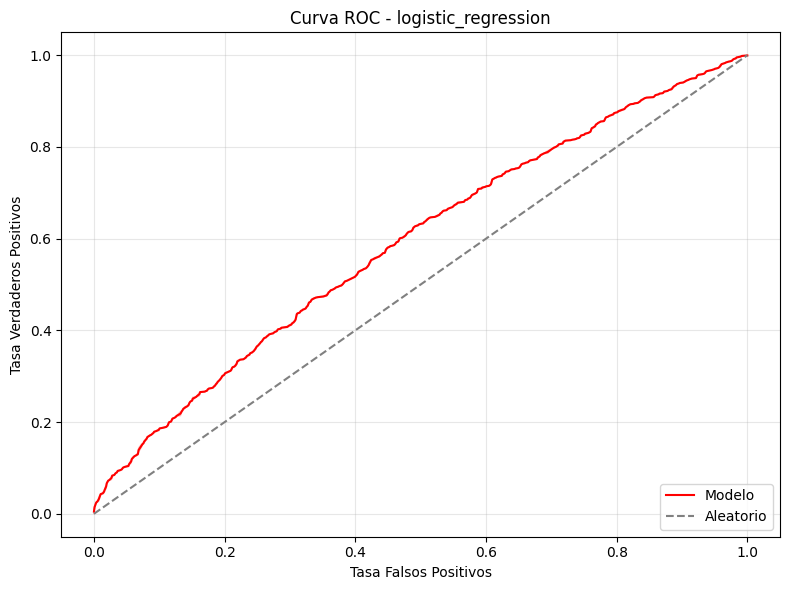

In [10]:
logistica.plot_curva_roc("logistic_regression")

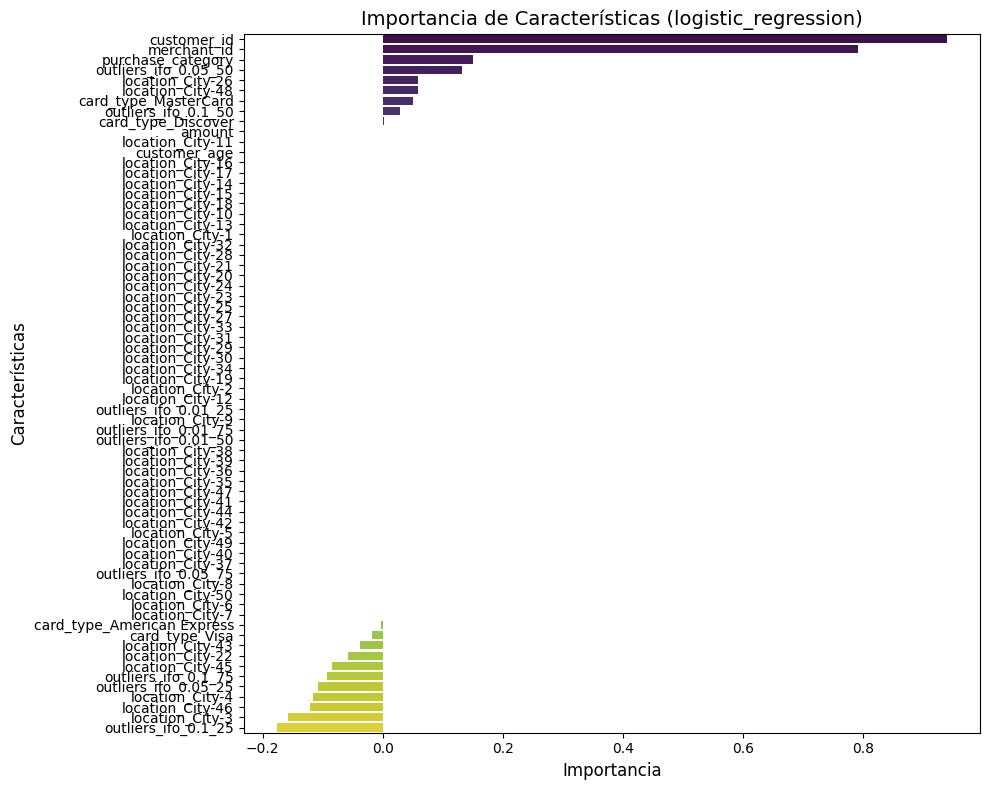

In [11]:

logistica.importancia_predictores("logistic_regression")

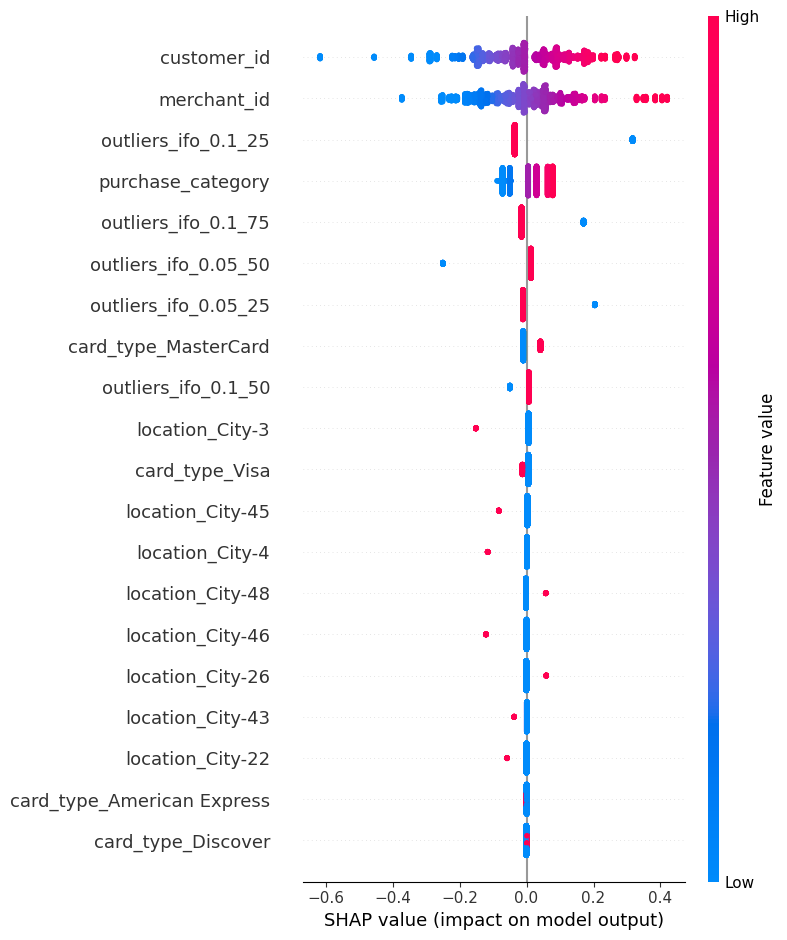

In [12]:
logistica.plot_shap_summary("logistic_regression")

# Decission tree

In [13]:
logistica.ajustar_modelo("tree")

In [14]:
df_resultados_tree = logistica.calcular_metricas(modelo_nombre =  "tree")
df_resultados_tree

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.565875,0.566953,0.565875,0.562878,0.130525,0.592843,0.00798,4.0,NaN,NaN
test,0.548500,0.547254,0.548500,0.544974,0.091471,0.570077,NaN,NaN,0.00798,4.0


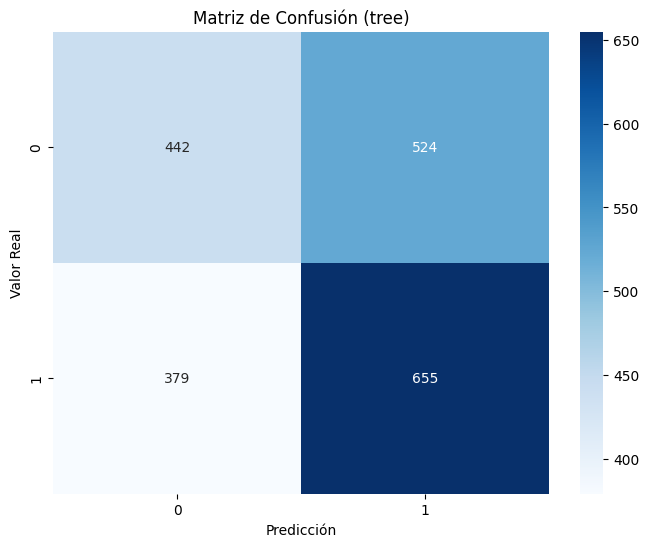

In [15]:
logistica.plot_matriz_confusion("tree")

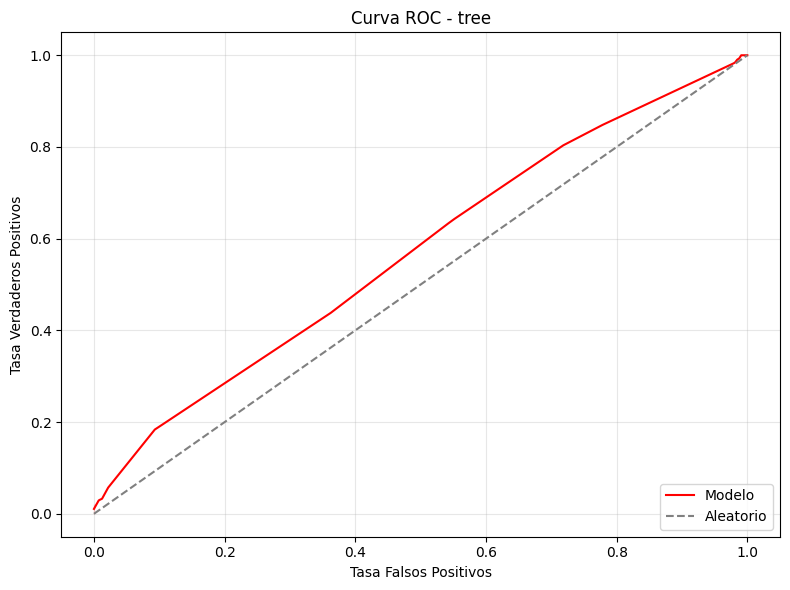

In [16]:
logistica.plot_curva_roc("tree")

# RandomForest

In [17]:
logistica.ajustar_modelo("random_forest")

In [18]:
df_resultados_rf = logistica.calcular_metricas(modelo_nombre = "random_forest")
df_resultados_rf

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.6875,0.688374,0.6875,0.686953,0.374553,0.767816,0.421872,-1.0,NaN,NaN
test,0.5775,0.576827,0.5775,0.576067,0.151509,0.611630,NaN,NaN,0.421872,-1.0


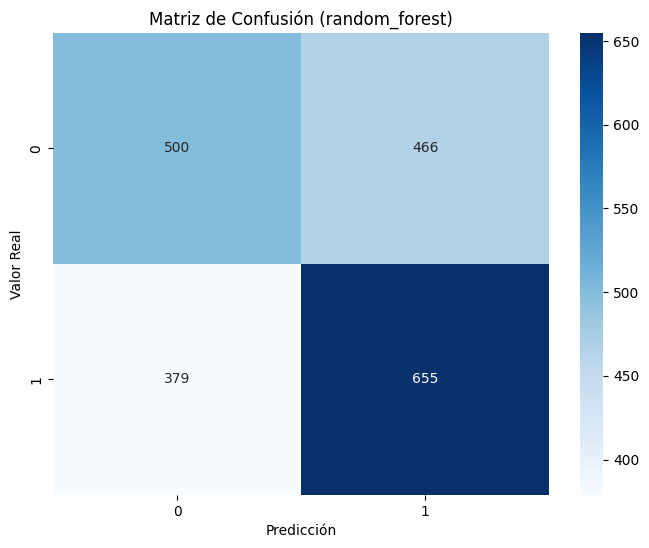

In [19]:
logistica.plot_matriz_confusion("random_forest")

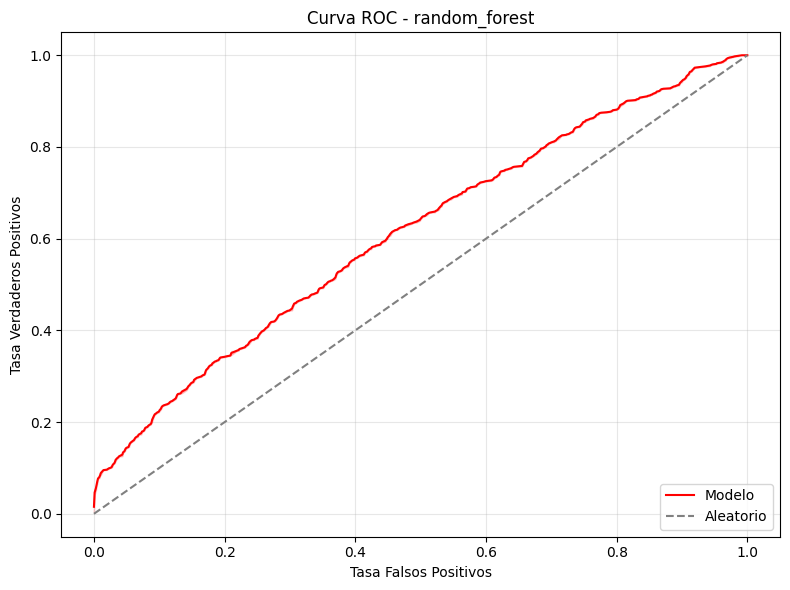

In [20]:
logistica.plot_curva_roc("random_forest")

# Gradient Boost

In [21]:
logistica.ajustar_modelo("gradient_boosting")

In [22]:
df_resultados_gb = logistica.calcular_metricas(modelo_nombre = "gradient_boosting")
df_resultados_gb

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.73525,0.736463,0.73525,0.734776,0.470117,0.824389,0.033909,4.0,NaN,NaN
test,0.58700,0.586474,0.58700,0.586242,0.171408,0.612971,NaN,NaN,0.033909,4.0


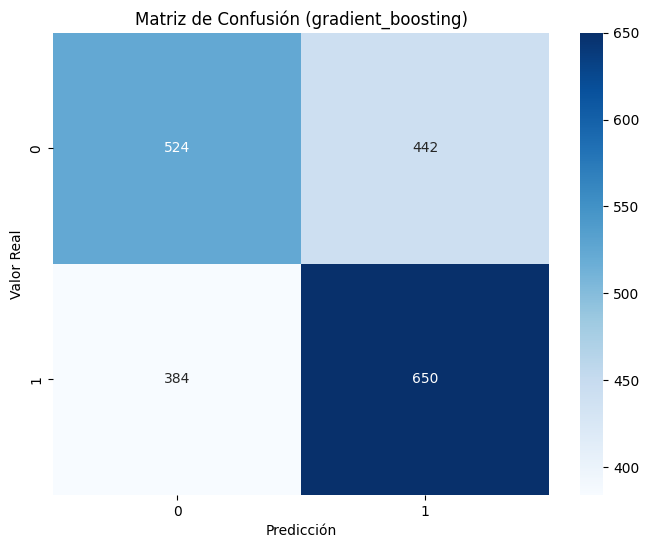

In [23]:
logistica.plot_matriz_confusion("gradient_boosting")

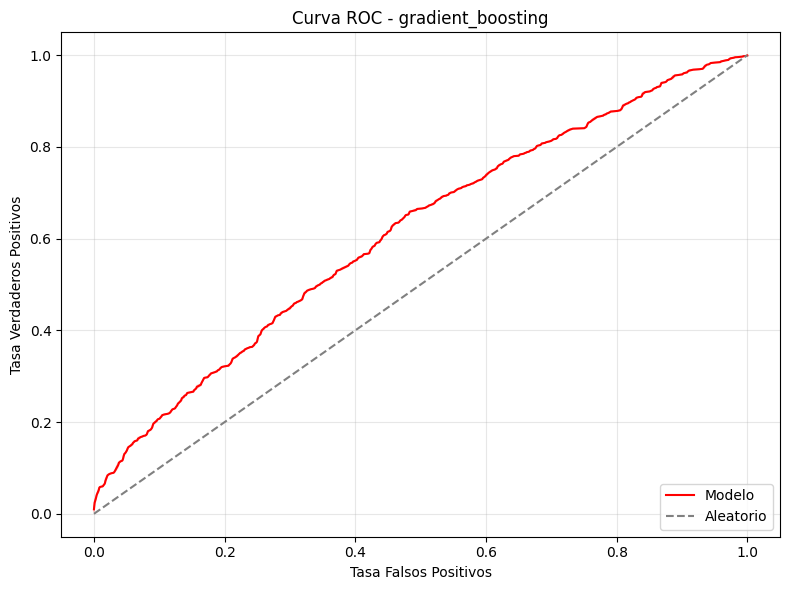

In [24]:
logistica.plot_curva_roc("gradient_boosting")

# xgboost

In [25]:
logistica.ajustar_modelo("xgboost")

In [26]:
df_resultados_xg = logistica.calcular_metricas(modelo_nombre = "xgboost")
df_resultados_xg

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.61425,0.618093,0.61425,0.610238,0.227166,0.672581,0.080783,NaN,NaN,NaN
test,0.56300,0.562481,0.56300,0.557247,0.119111,0.597113,NaN,NaN,0.080783,NaN


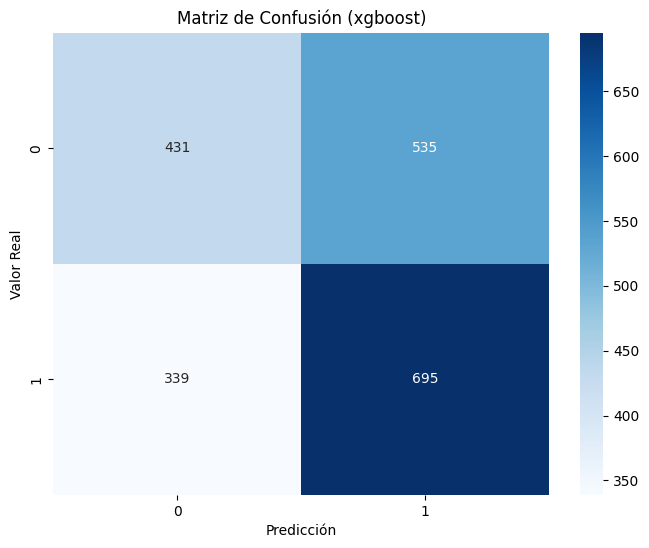

In [27]:
logistica.plot_matriz_confusion("xgboost")

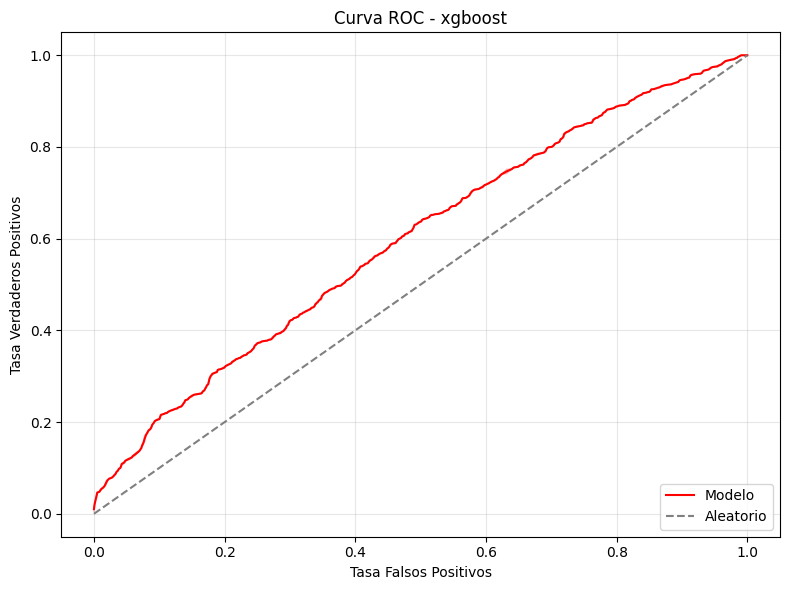

In [28]:
logistica.plot_curva_roc("xgboost")

Los mejores resultados en test los obtenemos con Random Forest, el xgboost da resultados parecidos aunqeu algo inferiores, con algo menos de overfitting y menos tiempo de ejecución. Pero el numero de falsos positivos que deteca es suerior al de verdaderos positivos, por lo cual lo consideramos un modelo inferior a Random Forest Los resultados dela Regresión logísitca son los más equilibrados, pues, los datos de test son muy parecidos a los de xgboost, (con menos falsos positivos) y solo ligeramente peores que los de RandomForest, pero el modelo es el más rapido de ejecución de todos y el único que no tiene overfitting.

GradientBoost y decision tree son evidentemente peores modelso que RandomForest y Regresion logistica. Entre estos dos, si queremos maximizar los resultados del test nos quedaremos con RandomForest, si queremos minimizar el tiempo de ejecución y corregir el overfitting nos quedaremos con Regresión logísitca.

Con respecto al Modelo 1 las metricas son peores